In [2]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
from pathlib import Path 

In [6]:
DATA_DIR = Path("C:\\Users\yogam\projects\\automobile-racing-toolbox\\racing_toolbox\\recorderapp\dataservice\data\\trackmania\czyjtu\preprocessing-day2")

In [12]:
img = cv2.imread(str(DATA_DIR / "ss31.jpeg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [23]:
img_wall = cv2.imread(str(DATA_DIR / "ss100.jpeg")) 
img_wall = cv2.cvtColor(img_wall, cv2.COLOR_BGR2RGB)
img_hsv_wall = cv2.cvtColor(img_wall, cv2.COLOR_RGB2HSV)

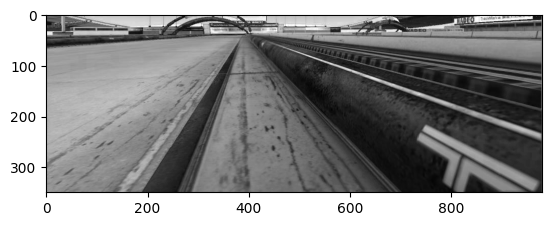

In [132]:
plt.imshow(img_hsv_wall[:, :, 2], cmap="gray")

In [129]:
def preprocess(img):
    img = cv2.GaussianBlur(img, (23, 23), 10)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[:, :, 2]
    img[img > 100] = 0
    img[img < 100] = 1

    # img = cv2.morphologyEx(img[:, :, 2], cv2.MORPH_OPEN, kernel=np.ones((7, 7)), iterations=5)
    return img


d
    

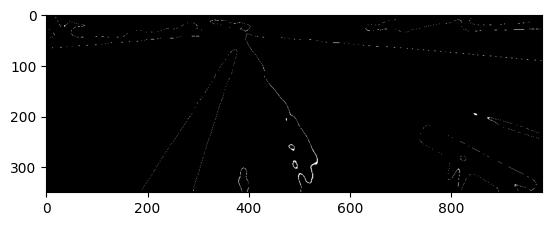

In [130]:
plt.imshow(preprocess(img_wall), cmap="gray")

In [ ]:
ret,thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

In [222]:
def segmentation(image):
    pixel_values = image.reshape((-1, 1))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
    segmented_image = centers[labels.flatten()]

    segmented_image = segmented_image.reshape(image.shape)
# show the image
    # plt.imshow(segmented_image, cmap="gray")
    # plt.show()
    return segmented_image

In [151]:
import timeit 

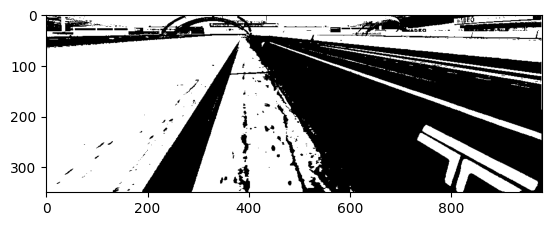

In [161]:
simg = segmentation(img_hsv_wall[:, :, 2])

In [203]:
def cross(h, w):
    mask = np.zeros((h, h))
    mid = h // 2
    mask[mid - w // 2: mid + w//2, :] = 1
    mask[:, mid - w//2 : mid + w//2] = 1
    return mask.astype(np.uint8) 

def star(h):
    mask = np.zeros((h, h))
    mask = np.eye(h) + np.rot90(np.eye(h), 2)
    mask[mask > 0] = 1
    return mask.astype(np.uint8)

In [220]:
from timeit import default_timer as timer

In [224]:
s = timer()
simg = segmentation(img_hsv_wall[:, :, 2])

mask = cross(15, 4)
simg = cv2.morphologyEx(simg, cv2.MORPH_OPEN, np.ones((5, 5)))
simg = cv2.morphologyEx(simg, cv2.MORPH_CLOSE, mask)
simg = cv2.morphologyEx(simg, cv2.MORPH_OPEN, star(10))

# plt.imshow(simg, cmap="gray")
print(timer() - s)

0.30913219996728003


In [177]:
cross(6, 1)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])